We're going to take an export of Google Trends data and then make a custom chart of that data in Python. Why would we want to do that?

So that we can have complete control over the the presentation of the data.

Instead of screenshotting or embedding Google-branded Trends data, we'll make it match the branding of my blog. Hopefully, things will be clear enough for you to customize the colors and fonts for your brand.

Start with basic imports and upload our CSV file from Google Trends.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
%matplotlib inline

#from google.colab import files
#uploaded = files.upload()

Now we're going to convert our CSV to a dataframe.

In [2]:
trends = pd.read_csv('multiTimeline.csv')
trends.head()

,,Category: All categories
Week,account based marketing: (United States),marketing automation: (United States)
2014-08-31,0,40
2014-09-07,0,46
2014-09-14,4,47
2014-09-21,3,41


Oops. We only have one column called *Category: All categories* with all of our data in one row. Let's fix that.

In [3]:
trends = pd.read_csv('multiTimeline.csv', header=1)
trends.head()

,Week,account based marketing: (United States),marketing automation: (United States)
0,2014-08-31,0,40
1,2014-09-07,0,46
2,2014-09-14,4,47
3,2014-09-21,3,41
4,2014-09-28,3,38


In [4]:
trends.dtypes

Week                                        object
account based marketing: (United States)     int64
marketing automation: (United States)        int64
dtype: object

Convert the Week column to datetime.

In [5]:
trends['Week'] = pd.to_datetime(trends['Week'], format="%Y-%m-%d")
trends.dtypes

Week                                        datetime64[ns]
account based marketing: (United States)             int64
marketing automation: (United States)                int64
dtype: object

Let's change our column headings.

In [6]:
trends.columns = ['Week', 'Account-Based Marketing', 'Marketing Automation']
trends.head()

,Week,Account-Based Marketing,Marketing Automation
0,2014-08-31,0,40
1,2014-09-07,0,46
2,2014-09-14,4,47
3,2014-09-21,3,41
4,2014-09-28,3,38


Now let's graph our data.

/home/damon/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


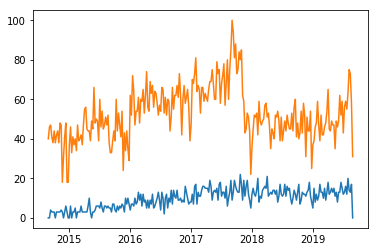

In [7]:
plt.plot(trends['Week'], trends['Account-Based Marketing'])
plt.plot(trends['Week'], trends['Marketing Automation'])
plt.show()

Not bad for default settings, but we can make this look nicer.

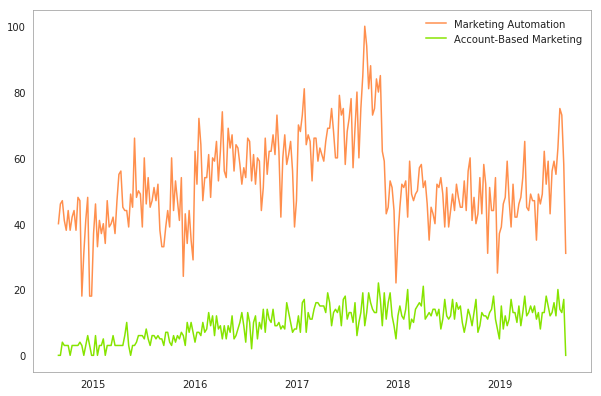

In [8]:
import matplotlib as mpl
#If you're using Jupyter on your system, the below works.
#In Google Colab, it's a pain to add fonts.
#mpl.rcParams['font.family'] = 'Open Sans'

#change border color
mpl.rcParams['axes.edgecolor'] = "#a3a3a3"

#change background color
#mpl.rcParams['axes.facecolor'] = "#a3a3a3"

#reset your changes
#mpl.rcParams.update(mpl.rcParamsDefault)


#figsize is in inches
plt.figure(figsize=[10, 6.66])
ax = plt.subplot()
ax.plot(trends['Week'], trends['Marketing Automation'], color="#ff8f4d")
ax.plot(trends['Week'], trends['Account-Based Marketing'], color="#86e400")
leg = plt.legend(frameon=False)

for text in leg.get_texts():
    plt.setp(text, color = '#212121')
ax.tick_params(bottom=False, top=False, left=False, right=False)

#change the color of the tick labels
[i.set_color("#212121") for i in plt.gca().get_xticklabels()]
[i.set_color("#212121") for i in plt.gca().get_yticklabels()]

plt.show()

Lets smooth out those lines and remove the borders.

No handles with labels found to put in legend.


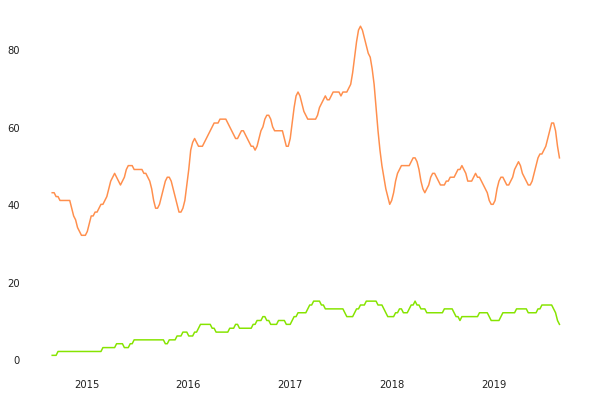

In [9]:
#If you're using Jupyter on your system, the below works.
#In Google Colab, it's a pain to add fonts.
#mpl.rcParams['font.family'] = 'Open Sans'

#change border color
mpl.rcParams['axes.edgecolor'] = "#a3a3a3"

#change background color
#mpl.rcParams['axes.facecolor'] = "#a3a3a3"

#reset your changes
#mpl.rcParams.update(mpl.rcParamsDefault)

from scipy.ndimage.filters import gaussian_filter1d

plt.figure(figsize=[10, 6.66])
ax = plt.subplot()
ax.plot(trends['Week'], gaussian_filter1d(trends['Marketing Automation'], sigma=2), color="#ff8f4d")
ax.plot(trends['Week'], gaussian_filter1d(trends['Account-Based Marketing'], sigma=2), color="#86e400")
leg = plt.legend(frameon=False)

for text in leg.get_texts():
    plt.setp(text, color = '#212121')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
#change the color of the tick labels
[i.set_color("#212121") for i in plt.gca().get_xticklabels()]
[i.set_color("#212121") for i in plt.gca().get_yticklabels()]

plt.show()

We'll manually re-add the labels to the legend and de-emphasize the text.

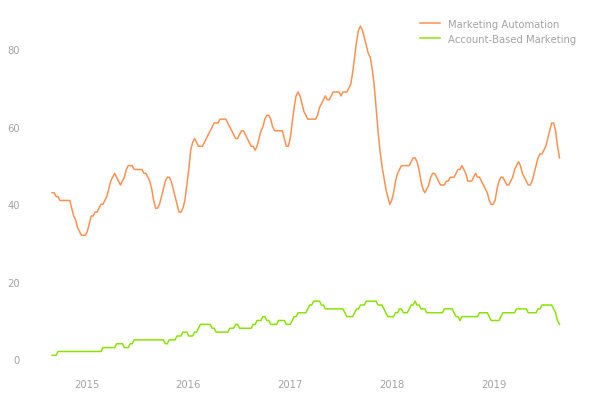

In [10]:
from scipy.ndimage.filters import gaussian_filter1d

#If you're using Jupyter on your system, the below works.
#In Google Colab, it's a pain to add fonts.
#mpl.rcParams['font.family'] = 'Open Sans'

#change border color
mpl.rcParams['axes.edgecolor'] = "#a3a3a3"

#change background color
#mpl.rcParams['axes.facecolor'] = "#a3a3a3"

#reset your changes
#mpl.rcParams.update(mpl.rcParamsDefault)


#figsize is in inches
plt.figure(figsize=[10, 6.66])
ax = plt.subplot()
ax.plot(trends['Week'], gaussian_filter1d(trends['Marketing Automation'], sigma=2), color="#ff8f4d", label="Marketing Automation")
ax.plot(trends['Week'], gaussian_filter1d(trends['Account-Based Marketing'], sigma=2), color="#86e400", label="Account-Based Marketing")
leg = plt.legend(frameon=False)

for text in leg.get_texts():
    plt.setp(text, color = '#a3a3a3')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#change the color of the tick labels
[i.set_color("#a3a3a3") for i in plt.gca().get_xticklabels()]
[i.set_color("#a3a3a3") for i in plt.gca().get_yticklabels()]

plt.show()

Finally, here's the whole script so you can paste it into your Jupyter Notebook or other Python environment and customize to your needs.

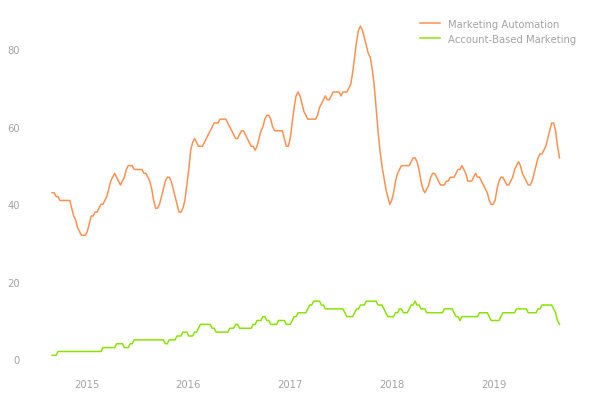

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import io
%matplotlib inline
from scipy.ndimage.filters import gaussian_filter1d

trends = pd.read_csv('multiTimeline.csv', header=1)
trends['Week'] = pd.to_datetime(trends['Week'], format="%Y-%m-%d")
trends.columns = ['Week', 'Account-Based Marketing', 'Marketing Automation']

#If you're using Jupyter on your system, the below works.
#In Google Colab, it's a pain to add fonts.
mpl.rcParams['font.family'] = 'Open Sans'

#change border color
mpl.rcParams['axes.edgecolor'] = "#a3a3a3"

#change background color
#mpl.rcParams['axes.facecolor'] = "#a3a3a3"

#reset your changes
#mpl.rcParams.update(mpl.rcParamsDefault)


#figsize is in inches
plt.figure(figsize=[10, 6.66])
ax = plt.subplot()
ax.plot(trends['Week'], gaussian_filter1d(trends['Marketing Automation'], sigma=2), color="#ff8f4d", label="Marketing Automation")
ax.plot(trends['Week'], gaussian_filter1d(trends['Account-Based Marketing'], sigma=2), color="#86e400", label="Account-Based Marketing")
leg = plt.legend(frameon=False)

for text in leg.get_texts():
    plt.setp(text, color = '#a3a3a3')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#change the color of the tick labels
[i.set_color("#a3a3a3") for i in plt.gca().get_xticklabels()]
[i.set_color("#a3a3a3") for i in plt.gca().get_yticklabels()]

plt.show()